In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
# import scipy.integrate as integrate
# import mpmath as mp

In [8]:
def draw_fig1(path):
    a = pd.read_csv(path)
    T2 = a.iloc[:,1].values
    M2 = a.iloc[:,2].values
    C2 = a.iloc[:,3].values
    M2error = np.sqrt(1/(18000-1)*abs(a.iloc[:,5].values/10000-(a.iloc[:,4].values/100)**2))

    plt.style.use('seaborn-whitegrid')
    plt.figure(dpi=300)


    plt.ylim(-0.1,2)
    plt.xlim(0,T2[-1])
    # plt.errorbar(T2,M2,yerr=M2error, lw=1, linestyle='', marker='s', markersize=5,capsize=7, color='b', label='magnetization',mfc='none')
    plt.plot(T2,M2, lw=1, linestyle='', marker='s', markersize=5, color='b', label='magnetization',mfc='none')
    plt.plot(T2,C2,linestyle='', marker='o', markersize=5, color='orange', label='specific heat',mfc='none')
    # plt.errorbar(T2,C2,yerr=C2error,linestyle='', marker='o', markersize=5,capsize=7, color='orange' ,label='specific heat',mfc='none')


    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.legend()
    # plt.text(0.05,1.91,"100 $\\times$ 100 lattice")
    # plt.text(0.05,1.79,"15000 steps per site")
    # plt.text(0.05,1.67,"Jackknife bin : 50")
    # plt.text(2.27, -0.2, '$T_c$', ha='center')


    plt.ylabel('Specific heat or magnetization per spin m')
    plt.xlabel('Temperature T')
    plt.show()

In [11]:
def draw_multi(path_list,Lsize):
    plt.style.use('seaborn-whitegrid')
    plt.figure(dpi=300)

    for i in range(len(path_list)):
        a = pd.read_csv(ls[i])
        T2 = a.iloc[:,1].values
        M2 = a.iloc[:,2].values
        C2 = a.iloc[:,3].values
        M2error = np.sqrt(1/(18000-1)*abs(a.iloc[:,5].values/10000-(a.iloc[:,4].values/100)**2))

        plt.ylim(-0.1,2)
        plt.xlim(0,T2[-1])
        # plt.errorbar(T2,M2,yerr=M2error, lw=1, linestyle='', marker='s', markersize=5,capsize=7, color='b', label='magnetization',mfc='none')
        plt.plot(T2,M2, lw=1, linestyle='', marker='s', markersize=5, label='magnetization'+ls2[i],mfc='none')
        plt.plot(T2,C2,linestyle='', marker='o', markersize=5, label='specific heat'+ls2[i],mfc='none')
        # plt.errorbar(T2,C2,yerr=C2error,linestyle='', marker='o', markersize=5,capsize=7, color='orange' ,label='specific heat',mfc='none')
        plt.legend()

    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.text(0.05,1.91,"100 $\\times$ 100 lattice")
    plt.text(0.05,1.79,"15000 steps per site")
    # plt.text(0.05,1.67,"Jackknife bin : 50")
    # plt.text(2.27, -0.2, '$T_c$', ha='center')


    plt.ylabel('Specific heat or magnetization per spin m')
    plt.xlabel('Temperature T')
    plt.show()

In [12]:
ls = []
ls.append("./Fisrt_Test/AA_Metropolis_c_16_16_int40_mcs1000000_a1.000000_Test__1.csv")
ls.append("./Fisrt_Test/AA_Metropolis_c_32_32_int40_mcs1000000_a1.000000_Test__1.csv")
ls.append("./Fisrt_Test/AA_Metropolis_c_48_48_int40_mcs500000_a1.000000_Test__1.csv")
ls.append("./Fisrt_Test/AA_Metropolis_c_64_64_int40_mcs500000_a1.000000_Test__1.csv")
ls2 = ["16","32","48","64"]

draw_multi(ls,ls2)

FileNotFoundError: File b'./Fisrt_Test/AA_Metropolis_c_16_16_int40_mcs1000000_a1.000000_Test__1.csv' does not exist

In [26]:
Lname = ["L24","L32","L48","L64","L96"]
Lsize = [24,32,48,64,96]

def draw_binder(path_list,Lsize,xliml = (1.5,4),yliml = (0.75,1)):
    Llist = []
    for path in path_list:
        Llist.append(pd.read_csv(path))
    marker = ["o","s","v","^","8"]
    T2 = Llist[0].iloc[:,1].values
    Binder = [0.5*(3-i.iloc[:,6].values/(i.iloc[:,5].values)**2) for i in Llist]

    plt.style.use('seaborn-whitegrid')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ylim(yliml)
    plt.xlim(xliml)
    for i in range(len(path_list)):
        plt.plot(T2,Binder[i],marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

    plt.legend()
    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.ylabel('Binder ratio g')
    plt.xlabel('Temperature T')
    # plt.text(2.265,0.748, '$T_c$')
    plt.show()

    # fig = plt.figure()
    # ax = fig.add_subplot(111)
    # # plt.ylim(0.75,1)
    # # plt.xlim(-2,2)
    # T22 = T2-2/np.log(1+np.sqrt(2))
    # for i in range(Llen):
    #     plt.plot(T22*Lsize[i],Binder[i],linestyle="",marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    # ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    # plt.legend()
    # plt.axvline(x=0,c='grey',lw=1,dashes=[2,2])
    # plt.ylabel('Binder ratio g')
    # plt.xlabel('Finite size scailing')
    # # plt.xlabel('$L^{1/\nu}[T-T_c]$')
    # plt.show()

In [44]:
def draw_binder_FFS(path_list,Lsize,xliml = (1.5,4),yliml = (0.75,1),Tc=2.269,nu=1):
    Llist = []
    for path in path_list:
        Llist.append(pd.read_csv(path))
    marker = ["o","s","v","^","8"]
    T2 = Llist[0].iloc[:,1].values
    Binder = [0.5*(3-i.iloc[:,6].values/(i.iloc[:,5].values)**2) for i in Llist]

    plt.style.use('seaborn-whitegrid')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ylim(yliml)
    plt.xlim(xliml)
    for i in range(len(path_list)):
        plt.plot(T2,Binder[i],marker=marker[i],markersize=5,mfc='none',label="L"+str(Lsize[i]))
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

    plt.legend()
    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.ylabel('Binder ratio g')
    plt.xlabel('Temperature T')
    # plt.text(2.265,0.748, '$T_c$')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ylim(0.75,1)
    plt.xlim(-2,2)
    T22 = T2-Tc
    for i in range(len(path_list)):
        plt.plot(T22*(Lsize[i]**(1/nu)),Binder[i],linestyle="",marker=marker[i],markersize=5,mfc='none',label="L"+str(Lsize[i]))
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.legend()
    plt.axvline(x=0,c='grey',lw=1,dashes=[2,2])
    plt.ylabel('Binder ratio g')
    plt.xlabel('Finite size scailing')
    # plt.xlabel('$L^{1/\nu}[T-T_c]$')
    plt.show()

In [16]:
def draw_1binder(path):
    L5 = pd.read_csv(path)
    # L5 = pd.read_csv("../C++/Result/Exact_c_5_int40_1.csv")
    Llist = [L5]
    T2 = L5.iloc[:,1].values
    Binder = [0.5*(3-i.iloc[:,6].values/(i.iloc[:,5].values)**2) for i in Llist]
    plt.style.use('seaborn-whitegrid')

    # plt.ylim(-0.1,2)
    plt.xlim(1.5,4)
    marker = ["o","s","o","s","o"]
    for i in range(1):
        plt.plot(T2,Binder[i],marker=marker[i],markersize=5)

    # plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])

    plt.show()

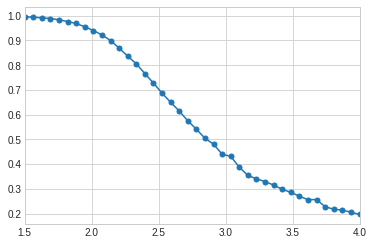

In [17]:
draw_1binder("./AA_Metropolis_c_6_6_int40_mcs100000_a3.000000_Test__1.csv")

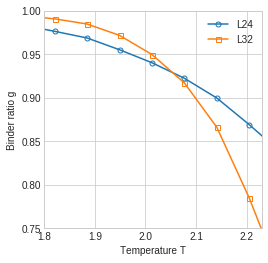

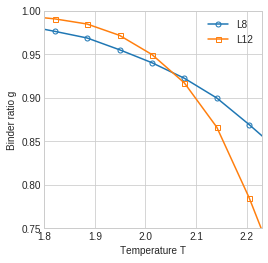

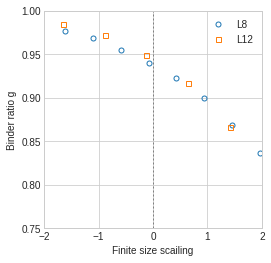

In [53]:
Lpath1 = ["./AA_Metropolis_c_6_6_int40_mcs100000_a3.000000_Test__1.csv","./AA_Metropolis_c_12_12_int40_mcs100000_a3.000000_Test__1.csv","./AA_Metropolis_c_24_24_int40_mcs100000_a3.000000_Test__1.csv"]
Lsize1 = [8,12,24]

draw_binder(Lpath1,Lsize1,(1.8,2.23),(0.75,1))
draw_binder_FFS(Lpath1,Lsize1,(1.8,2.23),(0.75,1),2.023)